# <font color="blue"> MBA em Ciência de Dados</font>
# <font color="blue">Técnicas Avançadas para Captura e Tratamento de Dados</font>

## <font color="blue"> Matriz Documento $\times$ Palavras - Bag of Words</font>
    
## <font color="blue">Solução dos Exercícios</font>

**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

<font color='red'> Recomendamos fortemente resolver os exercícios sem consultar as soluções antecipadamente </font>

Os exercícios abaixo fazem uso da coleção de documentos presente no diretório `DocCol2` contido no arquivo <font style="font-family: monaco"> DocCol.zip</font>, o qual pode ser baixado do Moodle.

In [7]:
!unzip DocCol2.zip

Archive:  DocCol2.zip
   creating: DocCol2/
  inflating: __MACOSX/._DocCol2      
  inflating: DocCol2/ch9             
  inflating: __MACOSX/DocCol2/._ch9  
  inflating: DocCol2/ch38            
  inflating: __MACOSX/DocCol2/._ch38  
  inflating: DocCol2/ch31            
  inflating: __MACOSX/DocCol2/._ch31  
  inflating: DocCol2/ch7             
  inflating: __MACOSX/DocCol2/._ch7  
  inflating: DocCol2/ch36            
  inflating: __MACOSX/DocCol2/._ch36  
  inflating: DocCol2/ch37            
  inflating: __MACOSX/DocCol2/._ch37  
  inflating: DocCol2/ch1             
  inflating: __MACOSX/DocCol2/._ch1  
  inflating: DocCol2/ch30            
  inflating: __MACOSX/DocCol2/._ch30  
  inflating: DocCol2/ch6             
  inflating: __MACOSX/DocCol2/._ch6  
  inflating: DocCol2/ch39            
  inflating: __MACOSX/DocCol2/._ch39  
  inflating: DocCol2/ch8             
  inflating: __MACOSX/DocCol2/._ch8  
  inflating: DocCol2/au8             
  inflating: __MACOSX/DocCol2/._au8  


### Exercício 1)
Armazene os documentos disponíveis no diretório `DocCol2` em um dicionário onde a chave é o nome do arquivo e o valor é a string contida no arquivo.

In [8]:
# Lendo o documento como uma string
import os  # os é um módulo que permite, de maneira simples, usar funcionalidades dependentes do sistema operacional
import glob  # glob é um pacote que permite varrer arquivos e diretorios utilizando sintaxe linux

files = glob.glob("DocCol2/*")

docs = {}
for fname in files:
    with open(fname,'r') as f:
        key = fname.split(os.sep)[-1]
        docs[key] = f.read()

print(docs.keys())

dict_keys(['ch20', 'ch7', 'ch11', 'gr23', 'ch2', 'ch43', 'ch8', 'ch12', 'ch28', 'ch29', 'ch19', 'gr21', 'gr11', 'ch31', 'ch21', 'gr6', 'ch18', 'gr16', 'au11', 'ch22', 'au4', 'au9', 'gr20', 'gr19', 'gr4', 'gr25', 'ch33', 'gr7', 'ch1', 'au7', 'gr8', 'gr12', 'au5', 'au14', 'ch39', 'ch40', 'ch23', 'au2', 'ch3', 'gr14', 'au1', 'gr18', 'ch17', 'gr3', 'ch10', 'au13', 'gr26', 'ch48', 'au6', 'ch37', 'ch46', 'ch13', 'ch24', 'au12', 'gr2', 'gr9', 'ch27', 'ch49', 'ch30', 'gr22', 'ch47', 'ch42', 'gr5', 'ch26', 'gr10', 'ch16', 'ch35', 'gr24', 'ch25', 'ch6', 'gr13', 'gr1', 'au15', 'au3', 'ch50', 'ch44', 'ch4', 'au8', 'ch38', 'au10', 'ch14', 'ch41', 'ch5', 'ch32', 'gr17', 'gr15', 'ch34', 'ch15', 'ch45', 'ch9', 'ch36'])


### Exercício 2)
Percorra as strings armazenadas como valores no dicionário criado no exercício 1), concatenando-as em uma única string. Quebre a string gerada em uma lista de palavras.

**DICA**: Utilize <font color='blue'>word_tokenize</font> do pacote <font color='blue'>nltk</font>

In [9]:
import nltk
nltk.download('punkt')

words = ''
for k,s in docs.items():   # concatenando as strings
    words = words+s

words = nltk.word_tokenize(words)  # lista de palavras
print(words[:10])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['From', ':', 'kempmp', '@', 'phoenix.oulu.fi', '(', 'Petri', 'Pihko', ')', 'Subject']


### Exercício 3)
Remova todas os "tokens" da lista criada no exercício 2) que sejam de comprimento 1 ou que contenham caractéres que não são letras do alfabeto. Faça com que todas as palavras estajam em letras minúsculas na lista resultante.

In [10]:
words = [w.lower() for w in words if w.isalpha() and len(w) != 1]
print(words[:20])

['from', 'kempmp', 'petri', 'pihko', 'subject', 're', 'atheist', 'views', 'on', 'christianity', 'was', 're', 'accepting', 'jeesus', 'in', 'your', 'heart', 'jason', 'smith', 'jasons']


### Exercício 4)
Remova da lista de palavras resultante do exercício 3) todas as "stop_words". Lembre-se que as palavras são da língua inglesa.

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# lista das stop words
stop_words = stopwords.words('english')

words = [w for w in words if w not in stop_words]
print(words[:20])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['kempmp', 'petri', 'pihko', 'subject', 'atheist', 'views', 'christianity', 'accepting', 'jeesus', 'heart', 'jason', 'smith', 'jasons', 'wrote', 'discussion', 'begins', 'universe', 'exist', 'one', 'laws']


### Exercício 5)
Faça a normalização léxica (stemming) das palavras da lista resultante do exercício 4) e remova palavras repetidas após a normalização. Quantas palavras foram removidas após a normalização léxica?

**Dica**: Utilize o método <font color='blue'>PorterStemmer</font> do pacote <font color='blue'>nltk.stem</font>

In [12]:
from nltk.stem import PorterStemmer

n_antes = len(words)
print(n_antes)
words = [PorterStemmer().stem(w) for w in words]
words = list(set(words))
n_depois = len(words)
print('Foram removidas ',n_antes-n_depois,' palavras')

#print(len(words),words[:20])

47253
Foram removidas  40472  palavras


### Exercício 6)
Gere uma lista de palavras para cada documento armazenado como valores no dicionário do exercício 1) aplicando os passos dos exercícios de 2 a 5 para cada documento.
Porém, no passo 5 não remova palavras repetidas após a normalização léxica. Armazene o resultado em um novo dicionário onde as chaves são os nomes dos documentos, como no dicionário do exercício 1), e os valores são as listas de palavras geradas para cada documento.

In [21]:
import nltk

In [29]:
docsXwords = {}

stop_words = stopwords.words("english")

for key, value in docs.items():
  words = nltk.word_tokenize(value)
  words = [w.lower() for w in words if w.isalpha() and len(w) >= 2]
  words = [w for w in words if w not in stop_words]
  words = [PorterStemmer().stem(w) for w in words]

  docsXwords[key] = words

### Exercício 7)
Utilize o dicionário contruído no exercício anterior para construir
uma matriz Documentos $\times$ Palavras para a coleção de documentos contidos no diretório `DocCol2`.

In [33]:
set(["a", "a", "b"])

{'a', 'b'}

In [38]:
corpus = []
for c in docsXwords.values():
  # corpus += c
  corpus.extend(c)

corpus = set(corpus)
len(corpus)

6781

In [48]:
import numpy as np
import pandas as pd

In [49]:
np.zeros((10, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [50]:
ncols = len(corpus)
nrows = len(docsXwords.keys())
data = np.zeros((nrows, ncols))
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
index = list(docsXwords.keys())
index[0:10]

['ch20', 'ch7', 'ch11', 'gr23', 'ch2', 'ch43', 'ch8', 'ch12', 'ch28', 'ch29']

In [58]:
columns = list(corpus)
columns[0:10]

['caen',
 'vendor',
 'hower',
 'pharo',
 'discov',
 'decis',
 'illinoi',
 'grey',
 'diamond',
 'back']

In [60]:
df = pd.DataFrame(
    data=data,
    index=index,
    columns=columns
)

df.head()

,caen,vendor,hower,pharo,discov,decis,illinoi,grey,diamond,back,...,sister,inde,public,resum,pro,forgiv,instal,rey,oath,creator
ch20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ch7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ch11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gr23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ch2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
def count_words(l):
  result = {}
  for i in l:
    result[i] = result.get(i, 0) + 1

  return result

l = docsXwords["ch20"]
count_words(l)

{'kempmp': 2,
 'petri': 3,
 'pihko': 2,
 'subject': 1,
 'atheist': 4,
 'view': 1,
 'christian': 6,
 'accept': 2,
 'jeesu': 1,
 'heart': 1,
 'jason': 2,
 'smith': 1,
 'wrote': 1,
 'discuss': 2,
 'begin': 1,
 'univers': 7,
 'exist': 34,
 'one': 5,
 'law': 3,
 'natur': 5,
 'specifi': 1,
 'caus': 2,
 'effect': 2,
 'seem': 2,
 'dictat': 1,
 'least': 1,
 'layman': 1,
 'mind': 6,
 'must': 3,
 'causal': 2,
 'event': 1,
 'reason': 4,
 'altern': 1,
 'would': 8,
 'argu': 1,
 'actual': 6,
 'properti': 1,
 'spacetim': 2,
 'preced': 1,
 'claim': 1,
 'answer': 10,
 'emerg': 4,
 'noth': 6,
 'scienc': 5,
 'good': 3,
 'candid': 1,
 'alway': 2,
 'wonder': 1,
 'use': 1,
 'question': 17,
 'atheism': 1,
 'argument': 3,
 'hope': 1,
 'appropri': 4,
 'group': 4,
 'ask': 5,
 'popular': 1,
 'origin': 2,
 'anyth': 4,
 'matter': 1,
 'think': 4,
 'split': 1,
 'two': 1,
 'part': 2,
 'name': 2,
 'clear': 1,
 'say': 3,
 'first': 2,
 'howev': 4,
 'meaning': 1,
 'consid': 1,
 'follow': 1,
 'skeptic': 1,
 'human': 3,
 'w

In [74]:
from collections  import Counter

Counter(l)

Counter({'kempmp': 2,
         'petri': 3,
         'pihko': 2,
         'subject': 1,
         'atheist': 4,
         'view': 1,
         'christian': 6,
         'accept': 2,
         'jeesu': 1,
         'heart': 1,
         'jason': 2,
         'smith': 1,
         'wrote': 1,
         'discuss': 2,
         'begin': 1,
         'univers': 7,
         'exist': 34,
         'one': 5,
         'law': 3,
         'natur': 5,
         'specifi': 1,
         'caus': 2,
         'effect': 2,
         'seem': 2,
         'dictat': 1,
         'least': 1,
         'layman': 1,
         'mind': 6,
         'must': 3,
         'causal': 2,
         'event': 1,
         'reason': 4,
         'altern': 1,
         'would': 8,
         'argu': 1,
         'actual': 6,
         'properti': 1,
         'spacetim': 2,
         'preced': 1,
         'claim': 1,
         'answer': 10,
         'emerg': 4,
         'noth': 6,
         'scienc': 5,
         'good': 3,
         'candid': 1,
         'a

In [66]:
df.iloc[0, 1] # acesso posicao linha coluna

0.0

In [67]:
df.loc["ch20", "caen"]

0.0

In [68]:
for k, v in docsXwords.items():
  aux = count_words(v) # Counter
  df.loc[k, aux.keys()] = aux.values()

In [72]:
df

,caen,vendor,hower,pharo,discov,decis,illinoi,grey,diamond,back,...,sister,inde,public,resum,pro,forgiv,instal,rey,oath,creator
ch20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ch7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ch11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gr23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ch2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0
ch15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ch45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ch9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exercício 8)
Utilizando PCA, projete a coleção de documentos no espaço gerado pelas duas direções principais da matriz Documentos $\times$ Palavras.

In [82]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

X = df.values
X_std = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X_std)

### Exercício 9)
Visualize a projeção da coleção de documentos no espaço bidimensional gerado no exercício anterior e se necessário faça um zoom para melhor visualizar a distribuição dos documentos.

In [88]:
classes = [i[0:2] for i in df.index.to_list()]
classes[:10]

['ch', 'ch', 'ch', 'gr', 'ch', 'ch', 'ch', 'ch', 'ch', 'ch']

<Axes: xlabel='c1', ylabel='c2'>

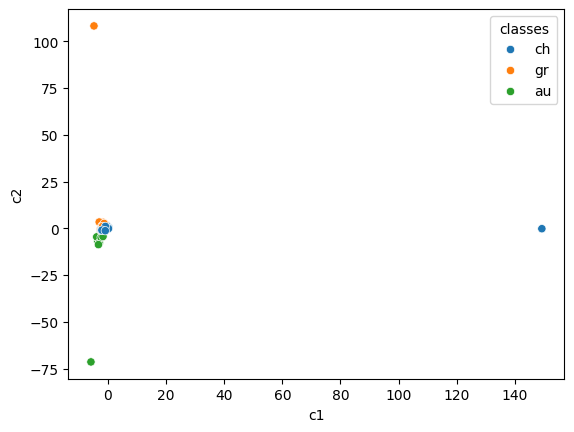

In [89]:
X_pca_df = pd.DataFrame(data=X_pca, columns=["c1", "c2"])
X_pca_df["classes"] = classes
sns.scatterplot(data=X_pca_df, x="c1", y="c2", hue="classes")

[(-5.0, 2.5)]

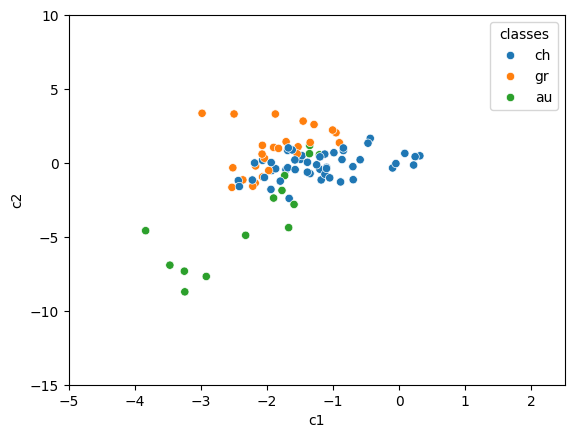

In [91]:
g = sns.scatterplot(data=X_pca_df, x="c1", y="c2", hue="classes")
g.set(ylim=(-15, 10))
g.set(xlim=(-5, 2.5))

### Exercício 10)
Dado o documento `au8` (linha de rótulo `au8` no DataFrame Documentos $\times$ Palavras) e utilizando a distância "cosseno"  (cosseno entre dois vetores correspondendo a vetorização dos documentos), encontre qual o documento mais parecido com `au8`. Calcule o cosseno entre a linha representada por `au8` na matriz Documentos $\times$ Palavras e todas as outras linhas, tomando o maior valor como correspondendo ao documento mais parecido.
Repita a projeção realizada no exercício 8), ressaltando o documento `au8` e o documento mais parecido com ele.

In [120]:
id = np.argwhere(df.index == "au8").flatten().flatten()
id

array([77])

In [121]:
# cos(x, y) = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

In [131]:
lcos = []
au8 = df.values[id]
x = au8
for y in df.values:
  cos = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
  lcos.append(cos[0])

In [135]:
idxs = np.argsort(lcos)
idxs

array([62, 31, 15, 58, 49, 67, 12, 82, 22, 70, 27, 51, 50, 13,  4, 64, 73,
       39, 52, 84, 38, 60, 88, 66,  9, 25, 42, 86,  2, 74, 30,  1, 47, 16,
       69, 14, 44, 80, 75, 43, 61, 63,  0, 68, 54,  6, 89, 71, 65, 83, 41,
       35, 85, 36, 59, 11, 26, 20, 57, 23,  3, 17, 19, 28, 56,  5, 81, 90,
       78,  7, 76, 46, 34,  8, 24, 87, 55, 21, 10, 37, 48, 40, 32, 79, 18,
       33, 45, 72, 53, 29, 77])

1.0000000000000002

1690.3064710654155

In [143]:
X_pca_df.iloc[[idxs[-2]], :]

,c1,c2,classes
29,-3.248496,-7.320137,au


[(-5.0, 2.5)]

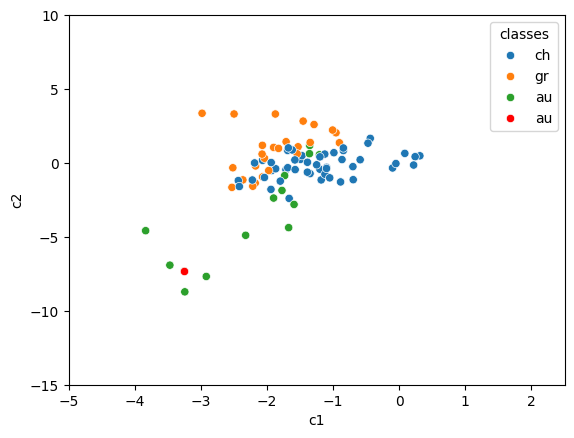

In [152]:
g = sns.scatterplot(data=X_pca_df, x="c1", y="c2", hue="classes")
sns.scatterplot(data=X_pca_df.iloc[[idxs[-2]], :], x="c1", y="c2", hue="classes",
                markers=['+', 'o','x','s','p'], palette=["red"])
g.set(ylim=(-15, 10))
g.set(xlim=(-5, 2.5))